In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [ ]:
from google.colab import files
files=files.upload()

Saving Realtimedata.csv to Realtimedata (1).csv


In [ ]:
df = pd.read_csv("Realtimedata.csv")
print("First Five Rows ","\n")
print(df.head(5),"\n")
print(df.tail(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

First Five Rows  

    Datetime  Consumption
0  1/10/2016        20189
1  1/11/2016        19907
2  1/12/2016        19440
3  1/13/2016        19001
4  1/14/2016        18933 

        Datetime  Consumption
1741  10/16/2020        15416
1742  10/17/2020        16005
1743  10/18/2020        16376
1744  10/19/2020        16650
1745  10/20/2020        16600 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Datetime     1746 non-null   object
 1   Consumption  1746 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.4+ KB
None 



In [ ]:
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

Describe the Dataset  

        Consumption
count   1746.000000
mean   14630.516037
std     2010.480088
min    10479.000000
25%    13108.250000
50%    14754.500000
75%    15698.750000
max    22549.000000 

Null Values t  

Datetime       0
Consumption    0
dtype: int64 



In [ ]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,Consumption,Month,Year,Date,Week,Day
Datetime,,,,,,
2016-01-10,20189,1,2016,2016-01-10,1,Sunday
2016-01-11,19907,1,2016,2016-01-11,2,Monday
2016-01-12,19440,1,2016,2016-01-12,2,Tuesday
2016-01-13,19001,1,2016,2016-01-13,2,Wednesday
2016-01-14,18933,1,2016,2016-01-14,2,Thursday


In [ ]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2016 2017 2018 2019 2020] 

Total Number of Unique Year 5 



No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

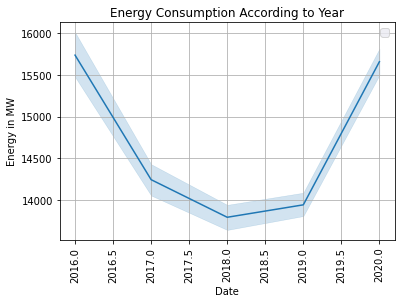

In [ ]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["Consumption"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

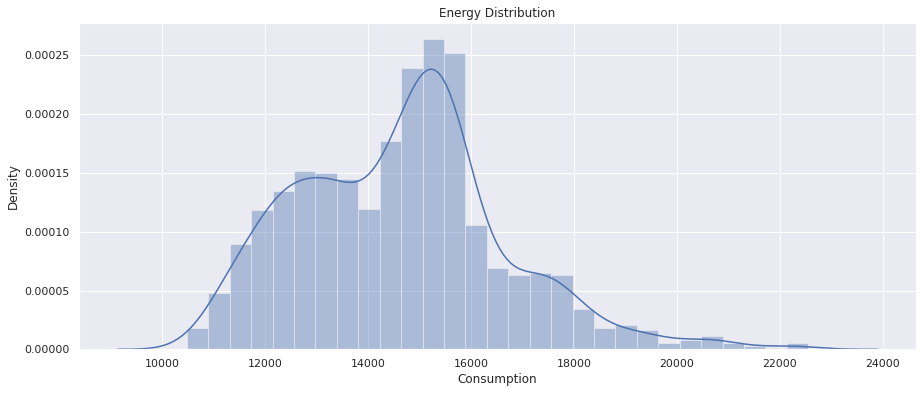

In [ ]:
sns.distplot(dataset["Consumption"])
plt.title("Energy Distribution")

In [ ]:
print("Dataset ",dataset.shape )

Dataset  (1746, 6)


In [ ]:
TestData = dataset.tail(100)

Training_Set = dataset.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [ ]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (1686, 1)
Test Set Shape  (100, 6)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
print(Training_Set)
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

            Consumption
Datetime               
2016-01-10        20189
2016-01-11        19907
2016-01-12        19440
2016-01-13        19001
2016-01-14        18933
...                 ...
2020-08-17        15568
2020-08-18        16086
2020-08-19        16920
2020-08-20        16790
2020-08-21        16055

[1686 rows x 1 columns]


In [ ]:
X_Train = []
Y_Train = []
 
for i in range(60, Train.shape[0]):
  
    X_Train.append(Train[i-60:i])
    
    Y_Train.append(Train[i])

X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(1626, 60, 1)
(1626, 1)


In [ ]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(1626, 60, 1)

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
history = regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32, validation_split = 0.1)

Epoch 1/50
46/46 [==============================] - 6s 126ms/step - loss: 0.0022 - val_loss: 0.0058
Epoch 2/50
46/46 [==============================] - 6s 123ms/step - loss: 0.0014 - val_loss: 0.0070
Epoch 3/50
46/46 [==============================] - 6s 125ms/step - loss: 0.0015 - val_loss: 0.0058
Epoch 4/50
46/46 [==============================] - 6s 125ms/step - loss: 0.0014 - val_loss: 0.0052
Epoch 5/50
46/46 [==============================] - 6s 124ms/step - loss: 0.0015 - val_loss: 0.0061
Epoch 6/50
46/46 [==============================] - 6s 124ms/step - loss: 0.0014 - val_loss: 0.0066
Epoch 7/50
46/46 [==============================] - 6s 125ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 8/50
46/46 [==============================] - 6s 124ms/step - loss: 0.0014 - val_loss: 0.0063
Epoch 9/50
46/46 [==============================] - 6s 123ms/step - loss: 0.0013 - val_loss: 0.0067
Epoch 10/50
46/46 [==============================] - 6s 124ms/step - loss: 0.0012 - val_loss: 0.0059

In [ ]:
TestData.head(2)

,Consumption,Month,Year,Date,Week,Day
Datetime,,,,,,
2020-07-13,17734,7,2020,2020-07-13,29,Monday
2020-07-14,17607,7,2020,2020-07-14,29,Tuesday


In [ ]:
TestData.shape

(100, 6)

In [ ]:
dataset.shape

(1746, 6)

In [ ]:
Df_Total = pd.concat((dataset[["Consumption"]], TestData[["Consumption"]]), axis=0)

In [ ]:
Df_Total.shape

(1846, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
True_MegaWatt = TestData["Consumption"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [ ]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2020-07-13,17734,17039.705078
1,2020-07-14,17607,17364.488281
2,2020-07-15,17640,17597.080078
3,2020-07-16,17662,17692.173828
4,2020-07-17,17609,17666.730469
...,...,...,...
95,2020-10-16,15416,13479.243164
96,2020-10-17,16005,14213.408203
97,2020-10-18,16376,15205.277344
98,2020-10-19,16650,16057.602539


In [ ]:
True_MegaWatt = TestData["Consumption"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


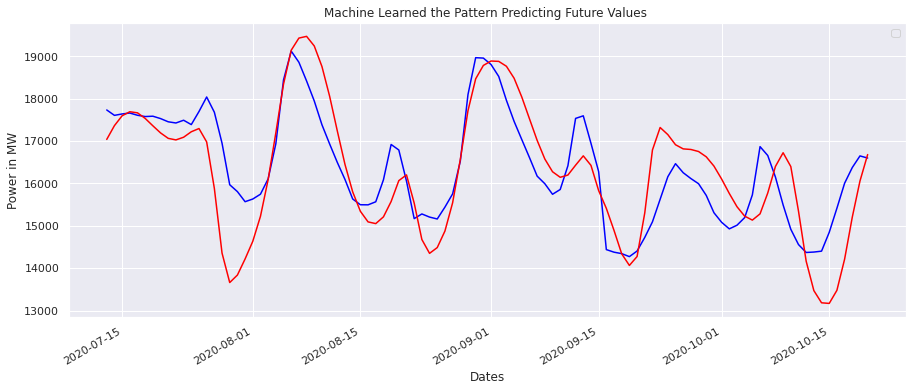

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="blue")
plt.plot(x,y1, color="red")
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()